In [1]:
# libraries
using Metrics          # r2-score
using Random
using Distributions
using Plots; gr()
using Printf

using CSV
using DataFrames
using MLJ              # blobs

In [2]:
function cross_entropy_loss(w, X, y)
    xpn = -y .* (X * w)
    res = log.(1 .+ exp.(xpn))    
    loss = mean(res)
end

X = [1 1 2 4;
    1 3 2 6;
    1 7 9 3]
y = [0.2;
    0.7;
    0.9]
d = size(X)[2]
rng = Random.seed!(1)      # generate seed
w = randn(rng, d)          # generate initial w vector

cross_entropy_loss(w, X, y)


1.2262195465902546

In [3]:
function cross_entropy_gradient(w, X, y)
    xpn = -y .* (X * w)

    numerator = y .* X
    denominator = log.( 1 .+ exp.(xpn) )
    res = numerator ./ denominator
    grad = mean(res, dims=1)   # média por coluna
end

cross_entropy_gradient (generic function with 1 method)

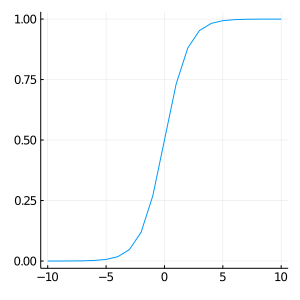

In [4]:
sigmoid(z) = 1 ./ (1 .+ exp.(-z))

x = -10:10
y = sigmoid(x)
gr()
plot(x, y, legend=false, size=(300,300))

In [5]:
function predict_logistic(X, w)
    N = size(X)[1]
    X_til = hcat(ones(N), X)
    Ŷ = sigmoid(w * X_til')
end

predict_logistic (generic function with 1 method)

In [72]:
function train_logistic(X, y, learning_rate = 0.1, num_iterations = 1000, return_history = false)

    N = size(X)[1]
    d = size(X)[2]
    Xe = hcat(ones(N), X)   # add ones to first column

    rng = Random.seed!(1)      # generate seed
    w0 = randn(rng, d+1)       # generate random initial w vector
    
    cross_entropy_loss_history = Vector{Float64}
    w = copy(w0)

    for t in 1:num_iterations
        if return_history
            pop!(cross_entropy_loss_history, cross_entropy_loss(w, Xe, y))
        end
        g = -cross_entropy_gradient(w, Xe, y)'
        
        if return_history
            return (w, cross_entropy_loss_history)
        else
            return w
        end
        w = w + learning_rate .* g

    end
    return res
end

train_logistic (generic function with 4 methods)

### Create data

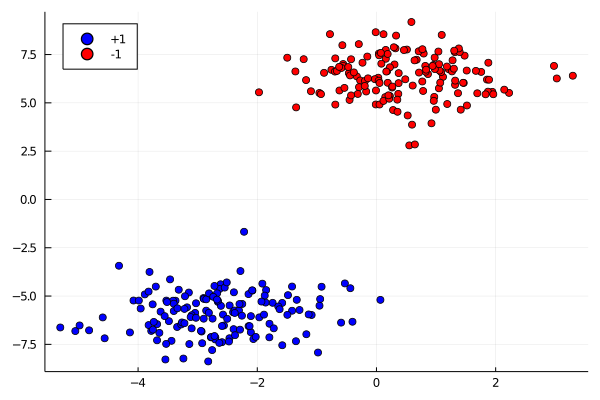

In [33]:
N = 300
X, y = make_blobs(N, 2; centers=2, cluster_std = 1, rng=2)
X = DataFrame(X) |> Array
y[ y .== 2 ] .= -1
y = y |> Array
y = y * 1.0

scatter(X[colors .== "blue", 1], X[colors .== "blue", 2], markercolor = "blue", label = "+1", legend = :topleft)
scatter!(X[colors .== "red", 1], X[colors .== "red", 2],  markercolor = "red",  label = "-1")

In [74]:
w_logistic, loss = train_logistic(X, y)

3-element Array{Float64,1}:
  0.2972879845354616
  0.3823959677906078
 -0.5976344767282311